# BANK MARKETING ANALYSIS

## DYMAS LAWULA ROHMAN

**Problem**:

The bank's marketing campaign process takes time and resources if the bank targets all customers without pre-screening. Banks want to increase campaign efficiency by knowing which candidates will place their deposits in the bank.

If the campaign is conducted for all candidates ``depositors``, then the time and costs will be wasted if the prospective depositors do not want to put their money in the bank.


**Metric Evaluation**

*Fake Positive
Consequences: wasted campaign costs, time, and resources

*Fake Negative
Consequence: loss of potential ``depositor``


**Target**

* So based on this problem, the bank wants to have the ability to predict the probability that a candidate will/want to place a ``deposit`` or not so that it can focus the campaign on candidates who are willing to place a deposit into the bank.

* Also, companies want to know what/what factors/variables make a candidate want to place a ``deposit`` or not so that they can make a better plan in approaching potential candidates (candidates who want to place their deposits).


**Analytical Approach**

* So what we are going to do is analyze the data to find patterns that distinguish candidates who are willing to place a ``deposit`` or not.

* Then we will build a classification model that will help the bank to predict the probability that a candidate will/want to place a ``deposit`` or not.


# 1. Install Module That Needed

In [ ]:
pip install --upgrade category_encoders

In [ ]:
!pip install imbalanced-learn

In [2]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

# Model
import pickle
import joblib

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from time import time
from IPython.display import display
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC
%matplotlib inline

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

<hr>

# 2. __Import Library__

In [5]:
#Upload Dataset
df_bank_marketing = pd.read_csv('/Users/dymaslawula/Documents/data001/MODUL3/data_bank_marketing_campaign.csv', encoding='windows-1254')

In [6]:
df_bank_marketing.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [7]:
df_bank_marketing.columns

Index(['age', 'job', 'balance', 'housing', 'loan', 'contact', 'month',
       'campaign', 'pdays', 'poutcome', 'deposit'],
      dtype='object')

<hr>

# 3. Missing Value Analysis

In [8]:
# Count and Datatype for each Column
df_bank_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


In [9]:
data_list_check01 = []
for col in df_bank_marketing.columns :
    data_list_check01.append([col, df_bank_marketing[col].dtype, df_bank_marketing[col].isna().sum(), round((df_bank_marketing[col].isna().sum()/len(df_bank_marketing[col])) * 100,2),
                    df_bank_marketing[col].nunique(), list(df_bank_marketing[col].drop_duplicates().sample(2).values)]);

desc_data = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=data_list_check01)
desc_data

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,75,"[54, 41]"
1,job,object,0,0.0,12,"[unknown, admin.]"
2,balance,int64,0,0.0,3153,"[357, 1661]"
3,housing,object,0,0.0,2,"[no, yes]"
4,loan,object,0,0.0,2,"[no, yes]"
5,contact,object,0,0.0,3,"[cellular, telephone]"
6,month,object,0,0.0,12,"[mar, may]"
7,campaign,int64,0,0.0,32,"[63, 20]"
8,pdays,int64,0,0.0,422,"[176, 17]"
9,poutcome,object,0,0.0,4,"[success, other]"


There is no missing/empty data, all features can be used and are ready to use to analyze problems and also create machine learning models. The existing data types are difficult to match the features, so there is no need to change the data type, and proceed to the Data Analysis stage for the problems at hand.

<hr>

# 4. Exploratory Data & Analysis

In [10]:
clients        = len(df_bank_marketing.index)
features       = df_bank_marketing.shape[1]
deposit        = len(df_bank_marketing[df_bank_marketing.deposit=="yes"].index)
nodeposit      = len(df_bank_marketing[df_bank_marketing.deposit=="no"].index)
deposit_rate   = (deposit/clients)*100
print ("The Total number of clients present in the data set are: {}".format(clients))
print ("The Number of clients that did deposite are: {}".format(deposit))
print ("The Number of clients that did not deposit are: {}".format(nodeposit))
print ("The Number of features are: {}".format(features-1))
print ("The Current subscription rate of the bank are: {:.2f}%".format(deposit_rate))

The Total number of clients present in the data set are: 7813
The Number of clients that did deposite are: 3732
The Number of clients that did not deposit are: 4081
The Number of features are: 10
The Current subscription rate of the bank are: 47.77%


Splitting the data into the feature and the target data was important to solve the problem because we used to predcit the target value only through the feature data

In [11]:
# Extraction features as (X) and target values as (y)
feature_col = df_bank_marketing.columns[:-1]  # all columns but last are features
target_col = df_bank_marketing.columns[-1]  # last column is the target/label
print ("Feature column(s):-\n{}".format(feature_col))
print ("Target column: {}".format(target_col))
xX = df_bank_marketing[feature_col]  
yY = df_bank_marketing[target_col]   
print("FEATURE CLOUMNS ARE ")
print (xX.head()) # print the first 5 rows
print("TARGET VALUES ARE")
print (yY.head())

Feature column(s):-
Index(['age', 'job', 'balance', 'housing', 'loan', 'contact', 'month',
       'campaign', 'pdays', 'poutcome'],
      dtype='object')
Target column: deposit
FEATURE CLOUMNS ARE 
   age            job  balance housing loan    contact month  campaign  pdays  \
0   55         admin.     1662      no   no   cellular   jun         2     -1   
1   39  self-employed    -3058     yes  yes   cellular   apr         3     -1   
2   51         admin.     3025      no   no   cellular   may         1    352   
3   38       services      -87     yes   no   cellular   may         1     -1   
4   36      housemaid      205     yes   no  telephone   nov         4     -1   

  poutcome  
0  unknown  
1  unknown  
2    other  
3  unknown  
4  unknown  
TARGET VALUES ARE
0    yes
1    yes
2    yes
3     no
4     no
Name: deposit, dtype: object


Predcit that the feature data has 10 features and target data has 1 feature which we want to predcit that knowing the feature data only.

In [12]:
display(df_bank_marketing.describe())

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


Text(0.5, 1.0, 'Distribution of Deposits')

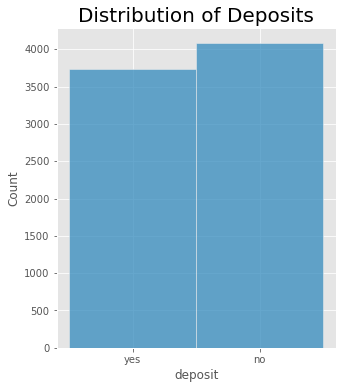

In [13]:
plt.figure(figsize=(5,20))

plt.subplot(311)
sns.histplot(data=df_bank_marketing,x='deposit', palette='Set1')
plt.title('Distribution of Deposits',fontsize=20)

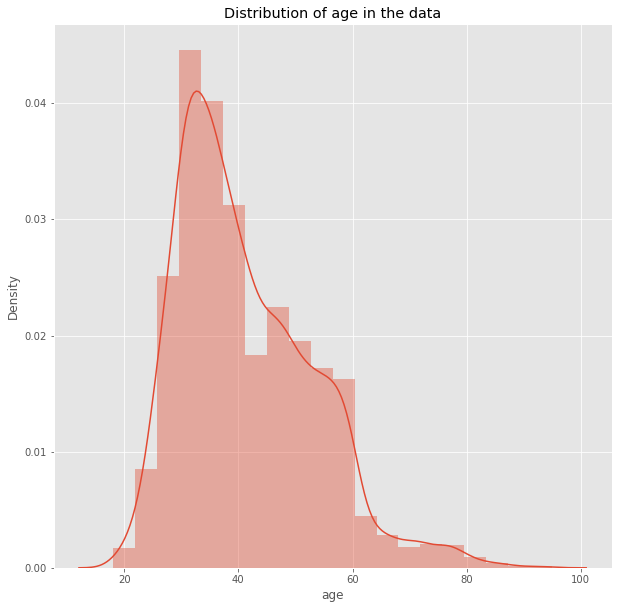

In [14]:
#histogram representation of data
h = sns.distplot(df_bank_marketing['age'], bins=20, kde=True)
plt.title('Distribution of age in the data')
h.figure.set_size_inches(10,10)

Text(0.5, 1.0, 'Deposit vs Age')

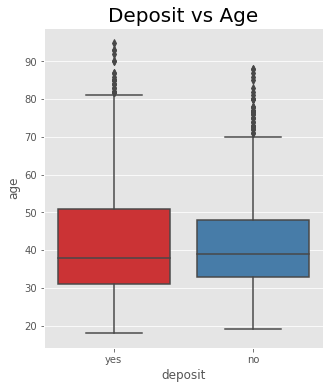

In [15]:
plt.figure(figsize=(5,20))

plt.subplot(312)
sns.boxplot(data=df_bank_marketing, x='deposit', y ='age', palette='Set1')
plt.title('Deposit vs Age',fontsize=20)

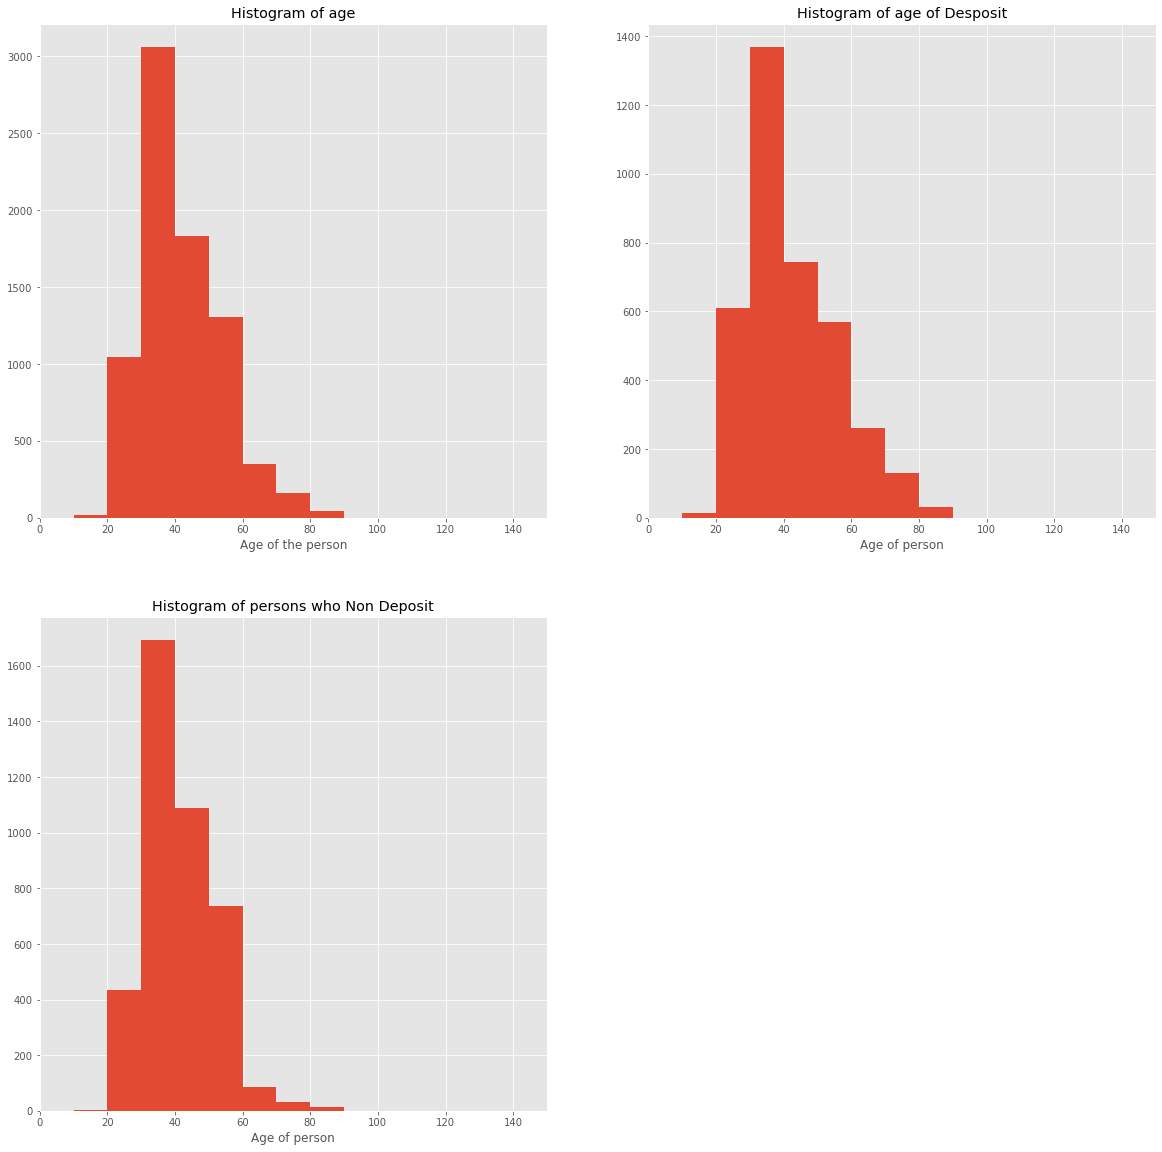

In [16]:
# here the visulaisation for the data was between the age and the age of persons and also who deposit and also the persons who not subscribed for the data
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
plt.xlim(0, 150)
plt.hist(xX['age'], bins=range(0,100,10))
plt.xlabel('Age of the person')
plt.title('Histogram of age')
plt.subplot(2, 2, 2)
plt.xlim(0, 150)
deposit = df_bank_marketing[df_bank_marketing['deposit']=='yes']
plt.hist(deposit['age'], bins=range(0,100,10))
plt.xlabel('Age of person')
plt.title('Histogram of age of Desposit')
plt.subplot(2, 2, 3)
plt.xlim(0, 150)
nondeposit = df_bank_marketing[df_bank_marketing['deposit']=='no']
plt.hist(nondeposit['age'], bins=range(0,100,10))
plt.xlabel('Age of person')
plt.title('Histogram of persons who Non Deposit')
plt.show()

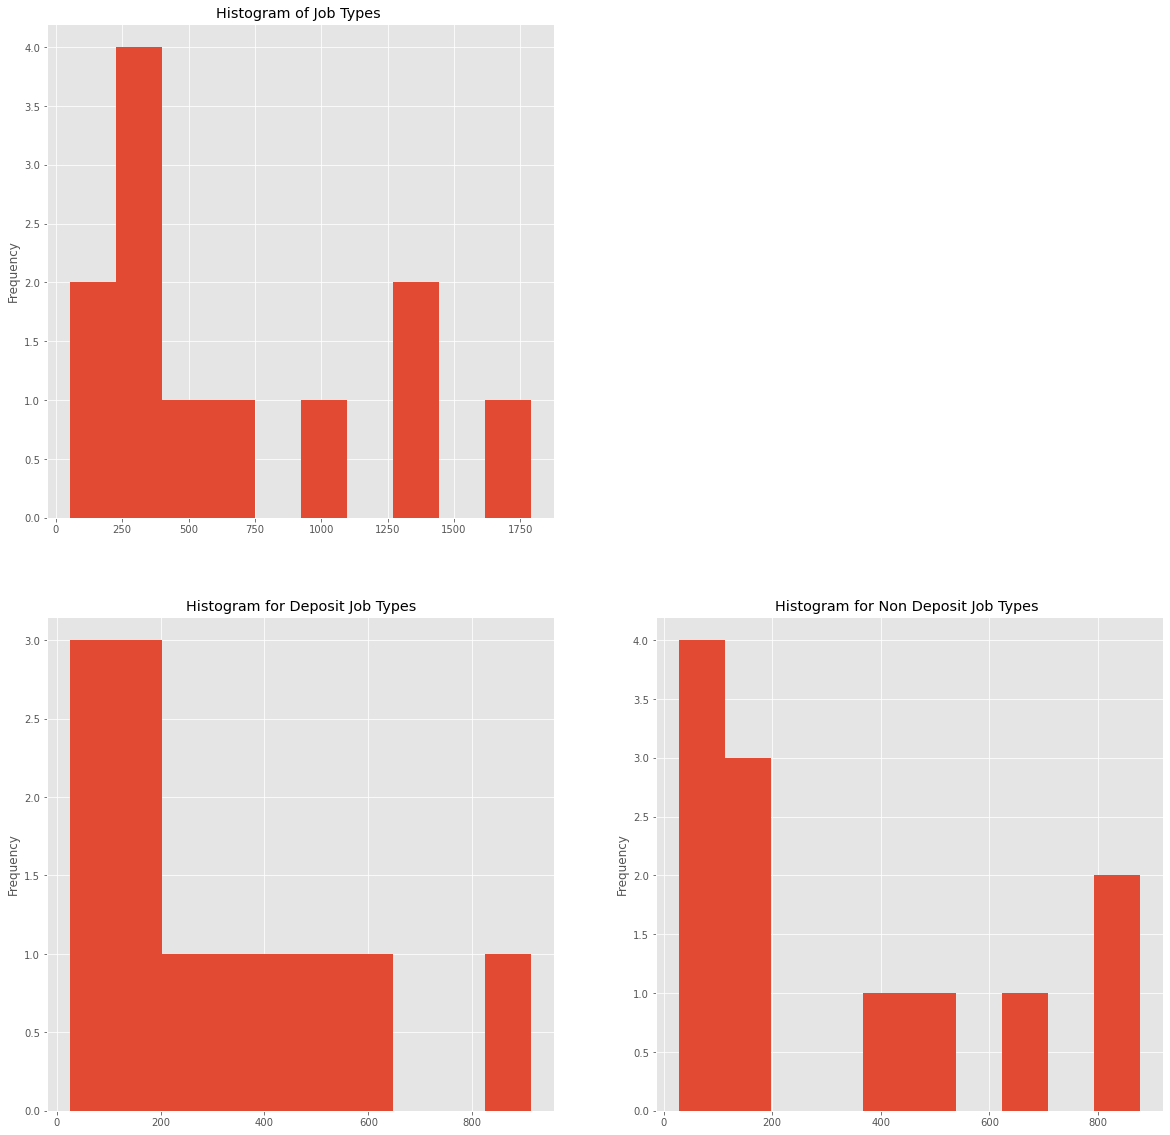

In [17]:
#the histogram of job type and the subscribers as well as non subscribers
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
plt.title('Histogram of Job Types ')
jobs = xX['job']
job_counts = jobs.value_counts()
job_counts.plot(kind='hist')
plt.subplot(2, 2, 3)
plt.title('Histogram for Deposit Job Types')
jobs = deposit['job']
job_counts = jobs.value_counts()
job_counts.plot(kind='hist')
plt.subplot(2, 2, 4)
plt.title('Histogram for Non Deposit Job Types ')
jobs = nondeposit['job']
job_counts = jobs.value_counts()
job_counts.plot(kind='hist')

plt.show()

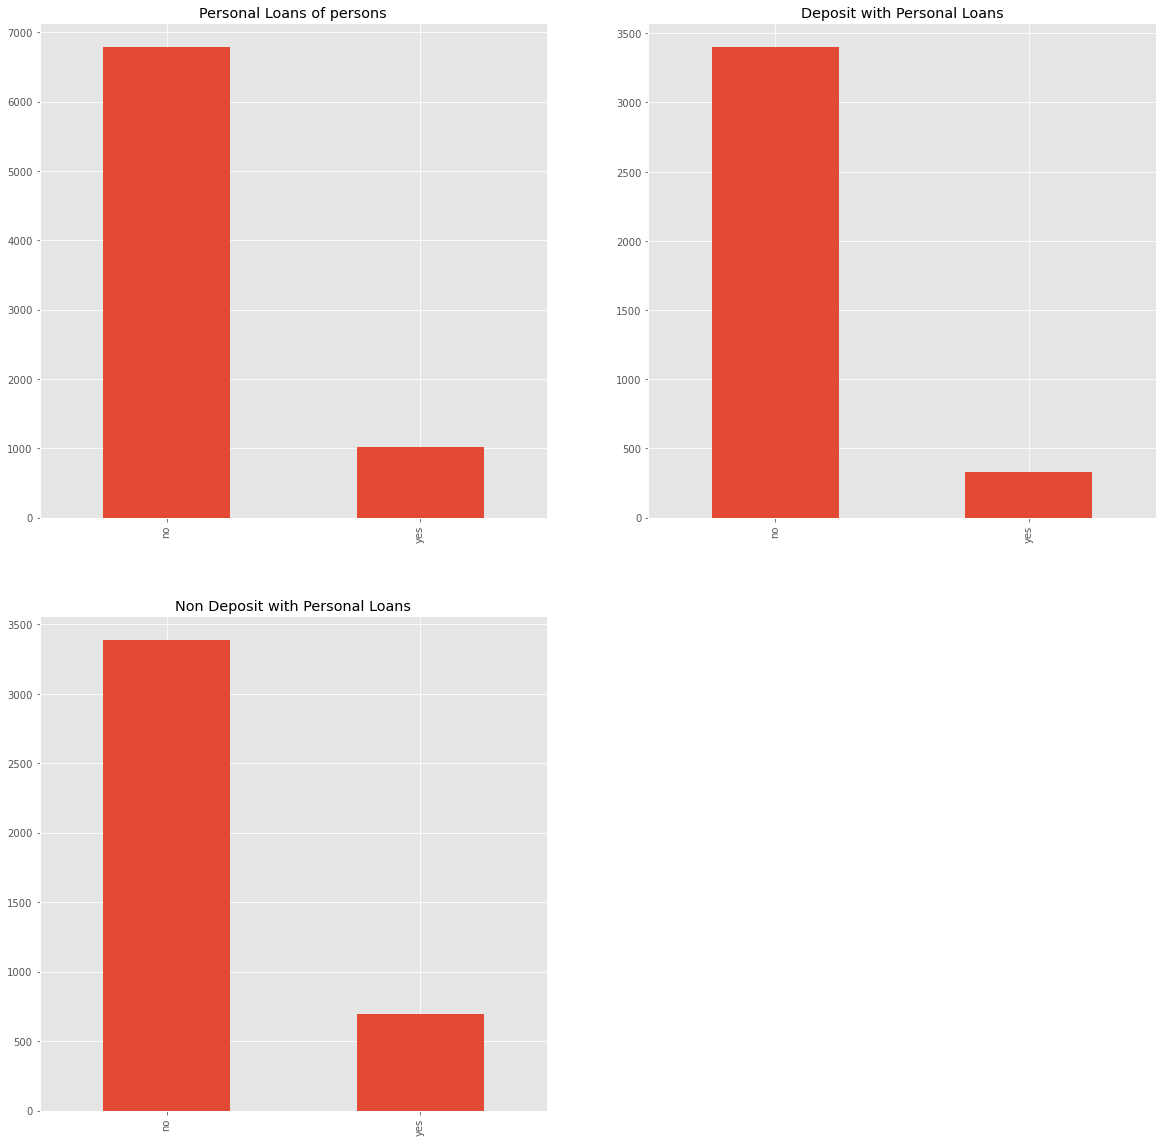

In [18]:
plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
plt.title('Personal Loans of persons')
loan = xX['loan']
loan_counts = loan.value_counts()
loan_counts.plot(kind='bar')

plt.subplot(2, 2, 2)
plt.title('Deposit with Personal Loans')
loan = deposit['loan']
loan_counts = loan.value_counts()
loan_counts.plot(kind='bar')

plt.subplot(2, 2, 3)
plt.title('Non Deposit with Personal Loans')
loan = nondeposit['loan']
loan_counts = loan.value_counts()
loan_counts.plot(kind='bar')

plt.show()

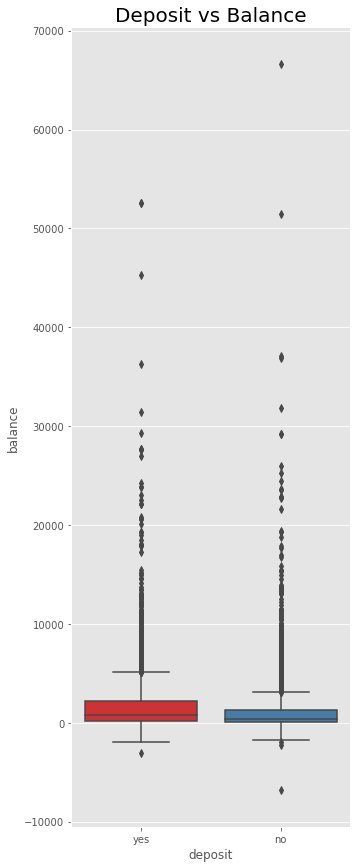

In [19]:
plt.figure(figsize=(5,50))

plt.subplot(311)
sns.boxplot(data=df_bank_marketing, x='deposit', y ='balance', palette='Set1')
plt.title('Deposit vs Balance',fontsize=20)

plt.show()

* Distribution of customer data that is deposited or unbalanced, so there is no need for handling imbalance
* The age of the customer who makes a deposit or not is the same, around 40 years old
* On the Deposit vs Balance graph, there are outliers whether the customer made a deposit or not, but here it will not be deleted for the outliers, because there are too many.

# 5. Data Preparation

In [20]:
df_bank_marketing.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [21]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['job', 'housing', 'loan', 'contact', 'month', 'poutcome']),
], remainder='passthrough')

In [22]:
x = df_bank_marketing.drop(columns=['deposit'])
y = df_bank_marketing['deposit']

x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2022)

x_train_preprocessed = transformer.fit_transform(x_train).toarray()
x_train_preprocessed

array([[ 0.000e+00,  0.000e+00,  0.000e+00, ...,  1.076e+03,  1.000e+00,
         9.600e+01],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  2.488e+03,  1.000e+00,
        -1.000e+00],
       [ 0.000e+00,  1.000e+00,  0.000e+00, ..., -7.010e+02,  2.000e+00,
        -1.000e+00],
       ...,
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  0.000e+00,  1.000e+00,
        -1.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  7.050e+02,  2.000e+00,
         3.500e+01],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  3.710e+02,  1.000e+00,
        -1.000e+00]])

In [23]:
test_data = pd.DataFrame(x_train_preprocessed, columns = transformer.get_feature_names())
test_data.dropna()

,onehot__x0_blue-collar,onehot__x0_entrepreneur,onehot__x0_housemaid,onehot__x0_management,onehot__x0_retired,onehot__x0_self-employed,onehot__x0_services,onehot__x0_student,onehot__x0_technician,onehot__x0_unemployed,onehot__x0_unknown,onehot__x1_yes,onehot__x2_yes,onehot__x3_telephone,onehot__x3_unknown,onehot__x4_aug,onehot__x4_dec,onehot__x4_feb,onehot__x4_jan,onehot__x4_jul,onehot__x4_jun,onehot__x4_mar,onehot__x4_may,onehot__x4_nov,onehot__x4_oct,onehot__x4_sep,onehot__x5_other,onehot__x5_success,onehot__x5_unknown,age,balance,campaign,pdays
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,33.0,1076.0,1.0,96.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,21.0,2488.0,1.0,-1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0,-701.0,2.0,-1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35.0,1330.0,1.0,-1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0,0.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,32.0,-1.0,2.0,-1.0
6246,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29.0,502.0,2.0,199.0
6247,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34.0,0.0,1.0,-1.0
6248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,705.0,2.0,35.0


In [24]:
def preprocess(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    out = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no','unknown'], [1, 0, np.nan])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        out= out.join(col_data)
    
    return out
full_data=preprocess(df_bank_marketing)
print("FEATURES COLUMNS AFTER PREPROCESSING IS",df_bank_marketing)

FEATURES COLUMNS AFTER PREPROCESSING IS       age            job  balance housing loan    contact month  campaign  \
0      55         admin.     1662      no   no   cellular   jun         2   
1      39  self-employed    -3058     yes  yes   cellular   apr         3   
2      51         admin.     3025      no   no   cellular   may         1   
3      38       services      -87     yes   no   cellular   may         1   
4      36      housemaid      205     yes   no  telephone   nov         4   
...   ...            ...      ...     ...  ...        ...   ...       ...   
7808   62      housemaid        2      no   no   cellular   nov         1   
7809   48      housemaid     5473      no   no   cellular   feb         2   
7810   36        unknown      179      no   no   cellular   aug         8   
7811   31         admin.       54     yes   no   cellular   nov         1   
7812   60        retired     1588      no   no   cellular   oct         1   

      pdays poutcome deposit  
0   

This step was a crucial step because the pre-processing refers to the transformations applied to our data before feeding it to the algorithm. Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.

In [25]:
validation_size = 0.40
from sklearn.model_selection import train_test_split

x_train, x_validation, y_train, y_validation = train_test_split(xX, yY, stratify = yY, 
                                                    test_size = validation_size, random_state = 123)
print("Train set 'yes' pct = {:.2f}%".format(100 * (y_train == 1).mean()))
print("Validation  set 'yes' pct = {:.2f}%".format(100 * (y_validation == 1).mean()))

# Show the results of the split
print("Training set has {} samples.".format(x_train.shape[0]))
print("Validation set has {} samples.".format(x_validation.shape[0]))

Train set 'yes' pct = 0.00%
Validation  set 'yes' pct = 0.00%
Training set has 4687 samples.
Validation set has 3126 samples.


splitting the data into the training data set and testing data was prime necessary step for the data to split and test the data here i used the validation_size as 0.40 and found that the training ser has 4687 and testing set as 3126

# 6. Modeling

In [26]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

## 6.1. Model Benchmarking - K-Fold

In [27]:
models = [logreg,knn,dt,rf]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest'],'mean roc_auc':rata,'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

,mean roc_auc,sdev
model,,
Logistic Regression,0.762103,0.015490
Random Forest,0.755362,0.010101
Decision Tree,0.624251,0.004500
KNN,0.620806,0.012888


It can be seen that the Random Forest model is better roc_auc  than any model that uses the default hyperparameter

## 6.2. Model Benchmarking - Test Data

In [28]:
models = [logreg,knn,dt,rf]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

          no       0.70      0.73      0.71       816
         yes       0.69      0.65      0.67       747

    accuracy                           0.69      1563
   macro avg       0.69      0.69      0.69      1563
weighted avg       0.69      0.69      0.69      1563

KNN 
               precision    recall  f1-score   support

          no       0.68      0.73      0.70       816
         yes       0.68      0.62      0.65       747

    accuracy                           0.68      1563
   macro avg       0.68      0.68      0.68      1563
weighted avg       0.68      0.68      0.68      1563

Decision Tree 
               precision    recall  f1-score   support

          no       0.85      0.88      0.86       816
         yes       0.86      0.84      0.85       747

    accuracy                           0.86      1563
   macro avg       0.86      0.86      0.86      1563
weighted avg       0.86      0

,roc_auc score
model,
Random Forest,0.940476
Decision Tree,0.856426
Logistic Regression,0.763528
KNN,0.728274


# 7. Prediction

In [31]:
estimator_final = Pipeline([
        ('preprocess',transformer),
        ('model',rf)])


estimator_final.fit(x_train, y_train)


filename = 'Pickle_Model_rf_rev4.sav'
pickle.dump(estimator_final, open(filename,'wb'))

In [32]:
print('Classification Report Random Forest : \n', classification_report(y_test,y_pred))

Classification Report Random Forest : 
               precision    recall  f1-score   support

          no       0.87      0.89      0.88       816
         yes       0.88      0.86      0.87       747

    accuracy                           0.88      1563
   macro avg       0.88      0.88      0.88      1563
weighted avg       0.88      0.88      0.88      1563



# 8. Conclusion & Recommendation

**Conclusion**

Selection part we can clearly identify duration playing an important attribute in defining the outcome of our dataset. It is absolute that the more the leads are interested in starting a deposit will have higher number of calls and the call duration will be higher than the average. We have also figured out that job and education also acts as a crucial deciding factor and influences the outcome alot.


Based on the results of the classification report from our model, we can conclude that if later we use our model to filter the list of customers that we will try to offer, then our model can reduce 90% of customers who are not interested in not approaching us, and our model can get 84% of interested customers from all customers who are interested in making a deposit. (all of this is based on recall). Our model has an accuracy of predicting customers who are interested in making deposits of 84% (precision), so each of our models predicts that a customer is interested, then the probability of his guess being correct is more or less 87%. So there will still be customers who are actually not interested but are predicted to be interested customers around 10% of the total uninterested candidates (based on recall). Based on this analysis, it appears that by using our model, banks can save substantial costs without sacrificing too many potential interested customers.

**Recommendations**
* Classify job roles based on corporate tiers and approach all tier 1 employees within few days after the campaign commences
* Listen to the leads and extract more information to deliver the best deposit plan, which can increase the duration of calls and that can lead to a deposit
* Tune the campaign according to the national econometrics, don't chanelize the expenses on campaign when the national economy is performing poor
* Improve modeling from before or make improvements to models that have been made.
* Adding new features or columns that might be related to their interests, such as marital status, level of education, and others.
* Distribution of customer data that is deposited or unbalanced, so there is no need for handling imbalance
* Tried another ML algorithm and also tried hyperparameter tuning again.
* Analyzing the data that our model is still guessing wrong to find out the reasons and what the characteristics are.
* The age of the customer who makes a deposit or not is the same, around 40 years old
* On the Deposit vs Balance graph, there are outliers whether the customer made a deposit or not, but here it will not be deleted for the outliers, because there are too many.